# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [3]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

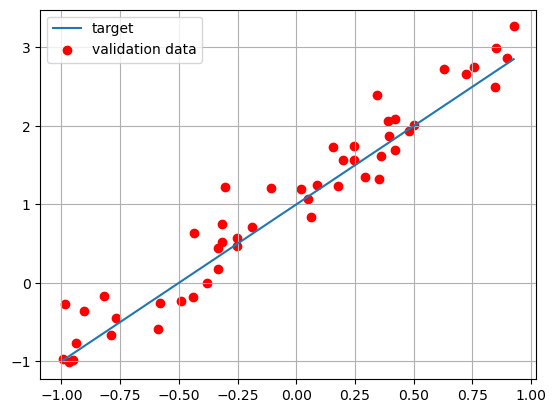

In [4]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [5]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2023-11-25 14:47:37.954529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 14:47:42.500509: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-25 14:47:42.500535: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-25 14:47:52.679162: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [6]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [7]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 2s 24ms/step - loss: 4.3624 - mse: 4.3624 - val_loss: 3.4815 - val_mse: 3.4815
Epoch 2/30
16/16 [==============================] - 0s 5ms/step - loss: 3.3346 - mse: 3.3346 - val_loss: 2.7004 - val_mse: 2.7004
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 2.6023 - mse: 2.6023 - val_loss: 2.1214 - val_mse: 2.1214
Epoch 4/30
16/16 [==============================] - 0s 6ms/step - loss: 2.0551 - mse: 2.0551 - val_loss: 1.6857 - val_mse: 1.6857
Epoch 5/30
16/16 [==============================] - 0s 6ms/step - loss: 1.6403 - mse: 1.6403 - val_loss: 1.3556 - val_mse: 1.3556
Epoch 6/30
16/16 [==============================] - 0s 7ms/step - loss: 1.3239 - mse: 1.3239 - val_loss: 1.1009 - val_mse: 1.1009
Epoch 7/30
16/16 [==============================] - 0s 6ms/step - loss: 1.0766 - mse: 1.0766 - val_loss: 0.8958 - val_mse: 0.8958
Epoch 8/30
16/16 [==============================] - 0s 6ms/step - loss: 0.8783 - mse: 0.8

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [8]:
# return weights and biases
model.get_weights()

[array([[1.9027296]], dtype=float32), array([0.96456105], dtype=float32)]

In [9]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 0.1034 - mse: 0.1034

Test loss: 0.103363037109375
Test accuracy: 0.103363037109375


In [10]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - mse: 0.0039

Test loss: 0.003913174383342266
Test accuracy: 0.003913174849003553


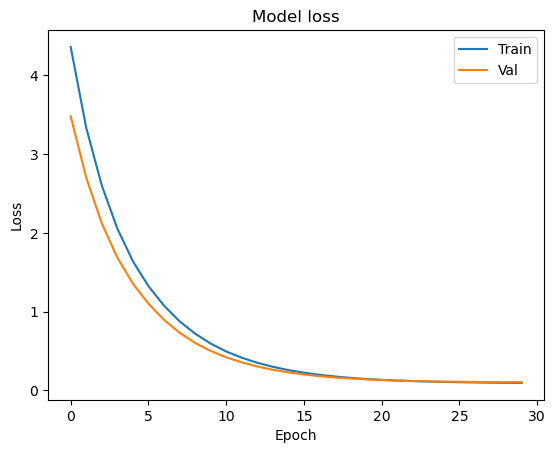

In [11]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

4/4 [==============================] - 0s 10ms/step


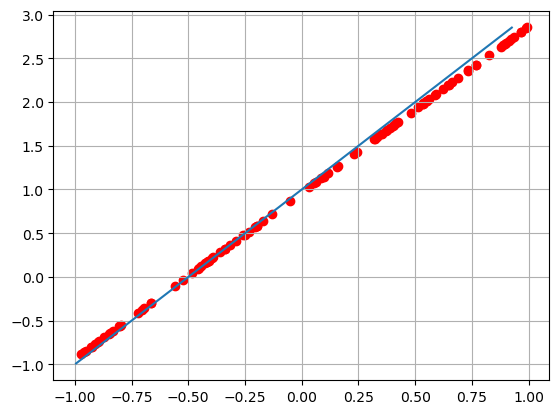

In [12]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [13]:
def GenerateData(Ntrain = 500, noise = 0.3):
    # generates noisy dataset divided into train and validation/test
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, Ntrain)
    x_valid = np.random.uniform(-1, 1, int(Ntrain/10))
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    y_train = np.random.normal(m * x_train + b, noise) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, noise)
    return x_train, y_train, x_valid, y_valid

In [14]:
def BuildModelAndTrain(x_train, y_train, x_valid, y_valid, Nepochs=30):
    # build and optimize the linear regression model
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    history = model.fit(x=x_train, y=y_train,  verbose=0,
            batch_size=32, epochs=Nepochs,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid))
    
    return model, history

### varying Nepochs
while keeping fixed the number of points and the noise, we let Nepochs vary

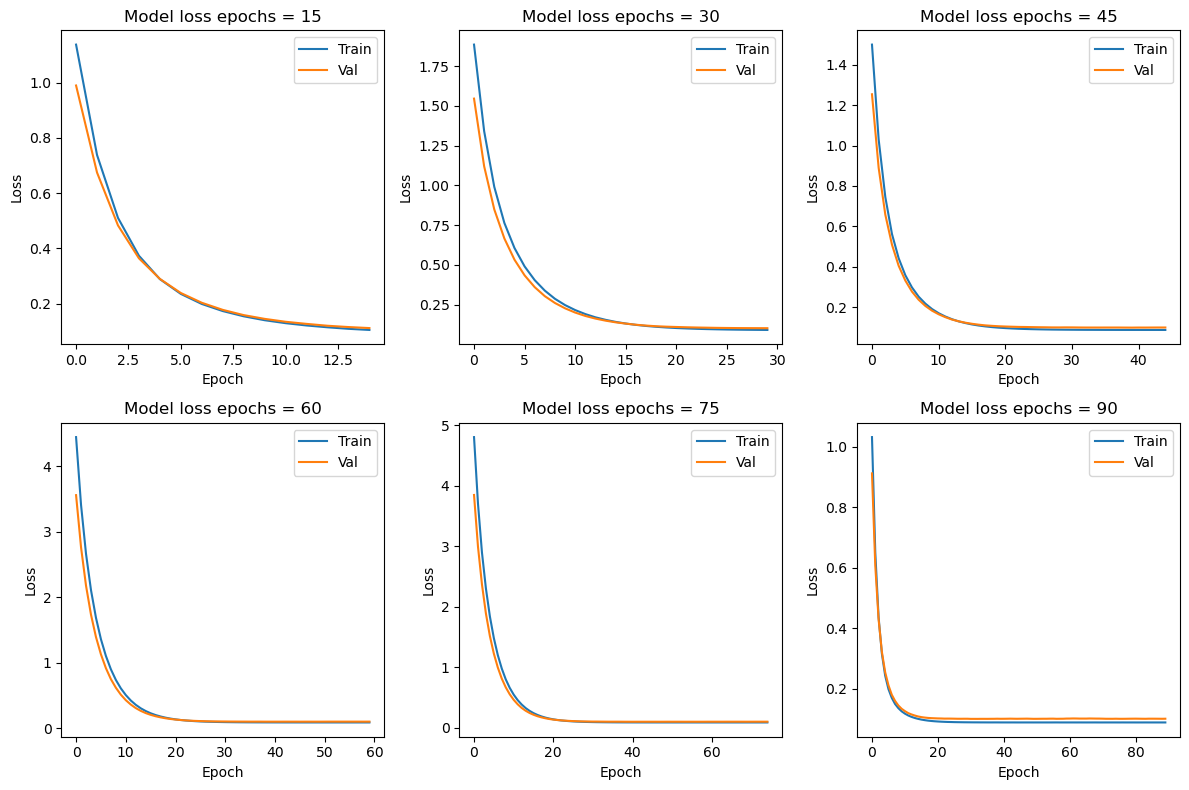

In [15]:
# Varying Nepochs
x_train, y_train, x_valid, y_valid = GenerateData(Ntrain = 500, noise = 0.3)
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
axs = ax.flatten()
for i in range(6):
    Nepochs = 15 * (i+1)
    model, history = BuildModelAndTrain(x_train, y_train, x_valid, y_valid, Nepochs)
    axs[i].plot(history.history['loss'])
    axs[i].plot(history.history['val_loss'])
    axs[i].set_title(f'Model loss epochs = {Nepochs}')
    axs[i].set_ylabel('Loss')
    axs[i].set_xlabel('Epoch')
    axs[i].legend(['Train', 'Val'], loc='best')

plt.tight_layout()
plt.show()

We can see that the more the epochs, the better the convergence. We can infer that 60 epochs is more than enough to train this model.

### Varying Ndata with Nepochs=60 

1/1 [==============================] - 0s 27ms/step - loss: 1.4858 - mse: 1.4858

Test loss 0: 1.4858384132385254
1/1 [==============================] - 0s 29ms/step - loss: 0.0112 - mse: 0.0112

Test loss 1: 0.011218319647014141
1/1 [==============================] - 0s 29ms/step - loss: 0.1628 - mse: 0.1628

Test loss 2: 0.16281822323799133


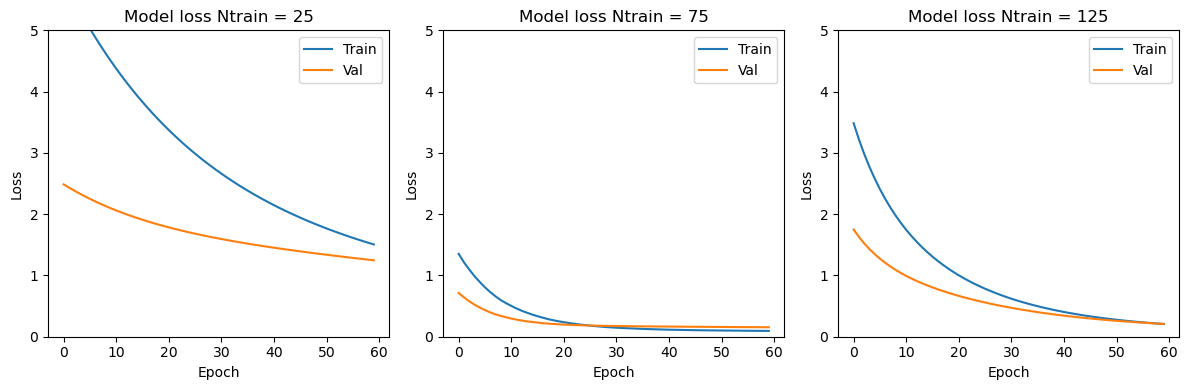

1/1 [==============================] - 0s 30ms/step - loss: 0.0014 - mse: 0.0014

Test loss 0: 0.00142611563205719
1/1 [==============================] - 0s 30ms/step - loss: 0.0015 - mse: 0.0015

Test loss 1: 0.001536718336865306
1/1 [==============================] - 0s 30ms/step - loss: 2.8412e-04 - mse: 2.8412e-04

Test loss 2: 0.0002841230307240039


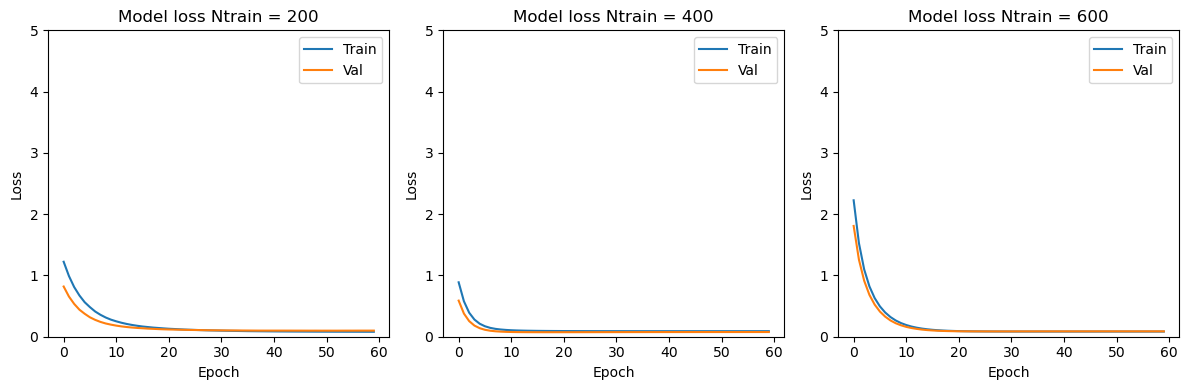

In [16]:
# Varying Ndata with Nepochs=60

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
axs = ax.flatten()
x_eval = np.linspace(-1,1,30)
for i in range(3):
    x_train, y_train, x_valid, y_valid = GenerateData(Ntrain = 25 +50*i, noise = 0.3)
    Nepochs = 60
    model, history = BuildModelAndTrain(x_train, y_train, x_valid, y_valid, Nepochs)
    axs[i].plot(history.history['loss'])
    axs[i].plot(history.history['val_loss'])
    axs[i].set_title(f'Model loss Ntrain = {25 +50*i}')
    axs[i].set_ylabel('Loss')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylim(0, 5)
    axs[i].legend(['Train', 'Val'], loc='best')
    # evaluate model with the exact curve 
    score = model.evaluate(x_eval, x_eval*2+1, batch_size=32, verbose=1)

    # print performance
    print()
    print(f'Test loss {i}:', score[0])

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
axs = ax.flatten()
for i in range(3):
    x_train, y_train, x_valid, y_valid = GenerateData(Ntrain = 200 + 200*i , noise = 0.3)
    Nepochs = 60
    model, history = BuildModelAndTrain(x_train, y_train, x_valid, y_valid, Nepochs)
    axs[i].plot(history.history['loss'])
    axs[i].plot(history.history['val_loss'])
    axs[i].set_title(f'Model loss Ntrain = {200 + 200*i}')
    axs[i].set_ylabel('Loss')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylim(0, 5)
    axs[i].legend(['Train', 'Val'], loc='best')

    # evaluate model with the exact curve
    score = model.evaluate(x_eval, x_eval*2+1, batch_size=32, verbose=1)

    # print performance
    print()
    print(f'Test loss {i}:', score[0])

plt.tight_layout()
plt.show()


The more the data, the best does our model when predicting! That is of course because more information is fed into it in the learning (sgd) process. 
However, going further we will keep Ndata$=500$ not to make things too easy for our models.

### Varying noise

1/1 [==============================] - 0s 29ms/step - loss: 0.0013 - mse: 0.0013

Test loss 0: 0.00133761006873101
1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - mse: 0.0038

Test loss 1: 0.0037684226408600807
1/1 [==============================] - 0s 28ms/step - loss: 0.0075 - mse: 0.0075

Test loss 2: 0.007526786532253027
1/1 [==============================] - 0s 30ms/step - loss: 0.0131 - mse: 0.0131

Test loss 3: 0.013053000904619694
1/1 [==============================] - 0s 34ms/step - loss: 0.0182 - mse: 0.0182

Test loss 4: 0.018215497955679893
1/1 [==============================] - 0s 28ms/step - loss: 0.0252 - mse: 0.0252

Test loss 5: 0.025208929553627968


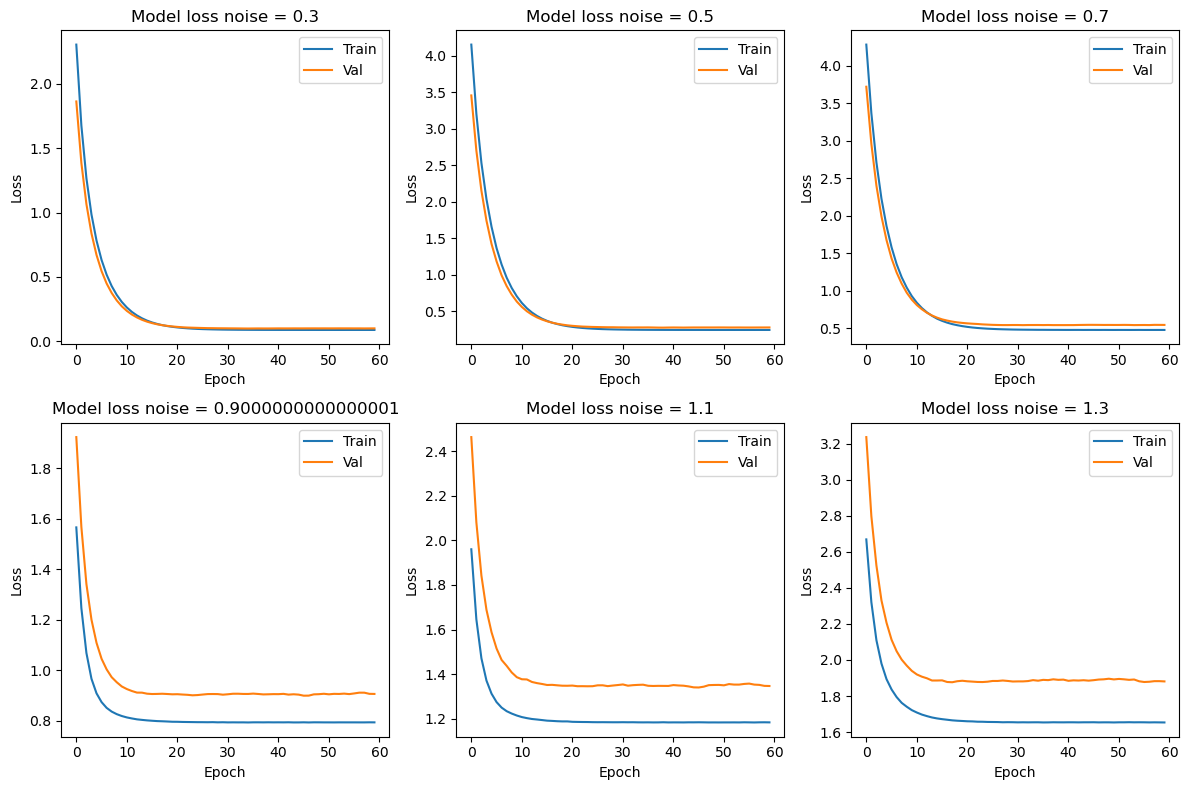

In [17]:
# Varying Noise
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
axs = ax.flatten()
x_eval = np.linspace(-1,1,30)
for i in range(6):
    x_train, y_train, x_valid, y_valid = GenerateData(Ntrain = 500, noise = 0.3+i*0.2)
    Nepochs = 60
    model, history = BuildModelAndTrain(x_train, y_train, x_valid, y_valid, Nepochs)
    axs[i].plot(history.history['loss'])
    axs[i].plot(history.history['val_loss'])
    axs[i].set_title(f'Model loss noise = {0.3+i*0.2}')
    axs[i].set_ylabel('Loss')
    axs[i].set_xlabel('Epoch')
    axs[i].legend(['Train', 'Val'], loc='best')

    # evaluate model with the exact curve
    score = model.evaluate(x_eval, x_eval*2+1, batch_size=32, verbose=1)
    # print performance
    print()
    print(f'Test loss {i}:', score[0])

plt.tight_layout()
plt.show()

When increasing the noise, the prediction precision lowers (=the test loss increases). It's also interesting to observe that training and validation errors part more and more.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

From here on we will keep Ntrain $= 500$ and a noise at least $=0.6$ to keep things interesting and make the training less simple.

In [18]:
def GenerateDataPoly(Ntrain = 500, noise = 0.6):
    # generates noisy dataset divided into train and validation/test
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, Ntrain)
    x_valid = np.random.uniform(-1, 1, int(Ntrain/10))
    x_valid.sort()
    y_target = 4- 3 * x_valid -2 * x_valid**2 + 3 * x_valid**3 # ideal (target) function

    y_train = np.random.normal(4- 3 * x_train -2 * x_train**2 + 3 * x_train**3, noise) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(4- 3 * x_valid -2 * x_valid**2 + 3 * x_valid**3, noise)
    return x_train, y_train, x_valid, y_valid, y_target

For our first Neural Network model we choose a net with two hidden layers of varying width, the first layer with sigmoid activation function and the second layer with relu. The model is compiled with a stochastich gradient descent optimization method (500 epochs), and an mse loss.

In [22]:
def NN_BuildAndTrain(x_train, y_train, x_valid, y_valid, width=6,Nepochs=60):
    # build and optimize the neural network
    model = tf.keras.Sequential()
    model.add(Dense(width, activation='sigmoid', input_shape=(1,)) )
    model.add(Dense(width, activation='relu')) 
    model.add(Dense(1, activation='linear')) 

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    history = model.fit(x=x_train, y=y_train,  verbose=0,
            batch_size=32, epochs=Nepochs,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid))
    
    return model, history

As we increase the width, we increase the number of parameters and the complexity. Widths tested are 2, 12 and 22;
We compare the true underlying function with the Neural Network prediction. In the same plot one can also see the validation data, to have an idea of the noise.

32/32 [==============================] - 0s 2ms/step


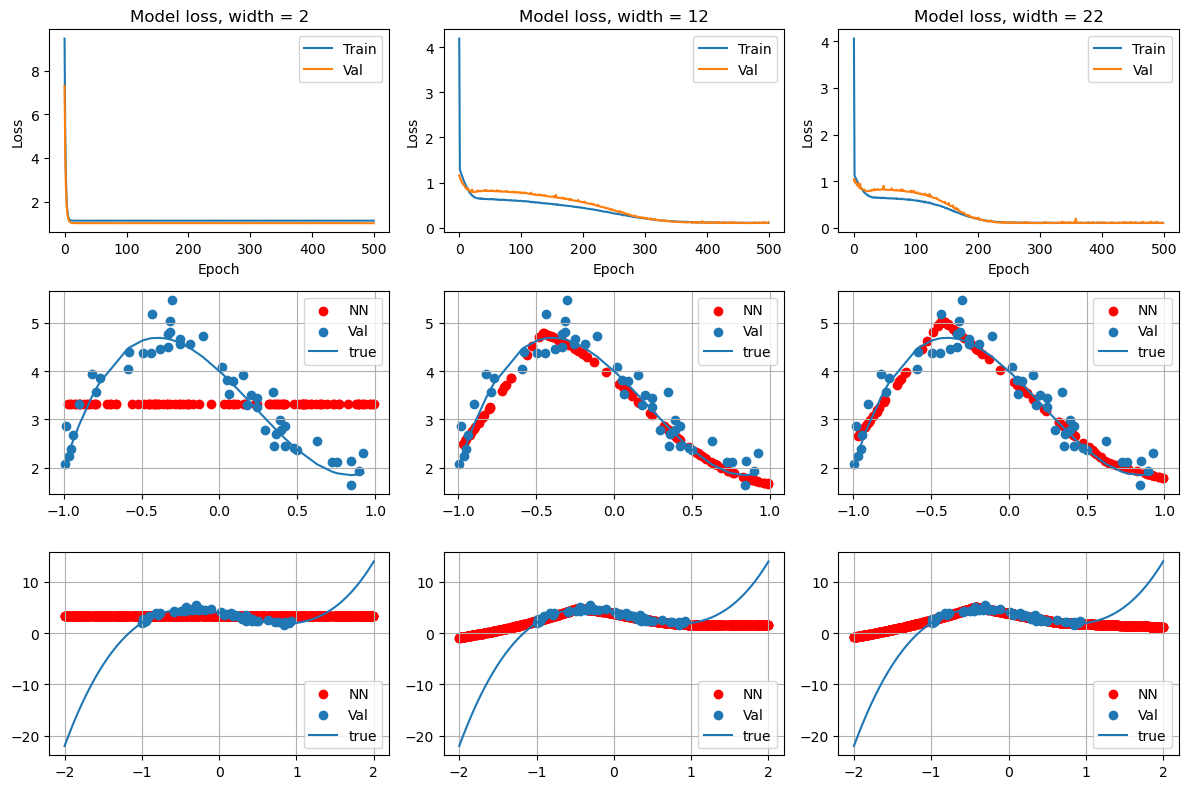

In [23]:
# two hidden layers, Varying NN width, sgd
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
axs = ax.flatten()
for i in range(3):
    x_train, y_train, x_valid, y_valid, y_target = GenerateDataPoly(Ntrain = 500, noise = 0.3)
    model, history = NN_BuildAndTrain(x_train, y_train, x_valid, y_valid, width=2+i*10, Nepochs=500)
    axs[i].plot(history.history['loss'])
    axs[i].plot(history.history['val_loss'])
    axs[i].set_title(f'Model loss, width = {2+i*10}')
    axs[i].set_ylabel('Loss')
    axs[i].set_xlabel('Epoch')
    axs[i].legend(['Train', 'Val'], loc='best')

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    axs[i+3].scatter(x_predicted, y_predicted,color='r')
    axs[i+3].scatter(x_valid, y_valid)
    axs[i+3].plot(x_valid, y_target)
    axs[i+3].legend(['NN', 'Val', 'true'], loc='best')
    axs[i+3].grid(True)

    x_predicted = np.random.uniform(-2, 2, 1000)
    y_predicted = model.predict(x_predicted)
    axs[i+6].scatter(x_predicted, y_predicted,color='r')
    axs[i+6].scatter(x_valid, y_valid)
    x_target = np.linspace(-2,2,1000)
    y_target = 4- 3 * x_target -2 * x_target**2 + 3 * x_target**3
    axs[i+6].plot(x_target, y_target)
    axs[i+6].legend(['NN', 'Val', 'true'], loc='best')
    axs[i+6].grid(True)


plt.tight_layout()
plt.show()

- We observe terrible results for the first net: it is likely that it is not enough expressive. In fact, even though the trainable parameter number is 12, while the polynomial is described with 4 parameters, not knowing the functional form (polynomial) and instead using a neural network parameterization induces a different scalability of the numbers of parameters, of course.
- The second net performs better than the second: also visually one can see that the second has undergone *overlearning*: at the peak the network learns the noise and not what we know is the true function. It is a possibility that the chosen NN is too complex for the problem, or the learning has been done badly.
- No net learns what happens truly outside $[-1,1]$ from the given data

Next we go for a deeper model(3 sigmoid layer + 1 relu), but less wide. We also choose a "more intelligent" optimization scheme: adam. We also try as loss the mean absolute error.

In [24]:
def NN_BuildAndTrain2(x_train, y_train, x_valid, y_valid, width=6,Nepochs=60):
    # build and optimize the neural network
    model = tf.keras.Sequential()
    model.add(Dense(width, activation='sigmoid', input_shape=(1,)) )
    model.add(Dense(width, activation='sigmoid') )
    #model.add(Dropout(0.25))                                             # Dropout layer for regularization
    model.add(Dense(width, activation='sigmoid') )
    model.add(Dense(width, activation='relu')) 
    model.add(Dense(1, activation='linear')) 

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

    #earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
    #              min_delta=0, patience=100, mode='auto')

    history = model.fit(x=x_train, y=y_train,  verbose=0,
            batch_size=32, epochs=Nepochs,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid),
            #callbacks=[earlystop]
            )
    
    return model, history

4/4 [==============================] - 0s 3ms/step


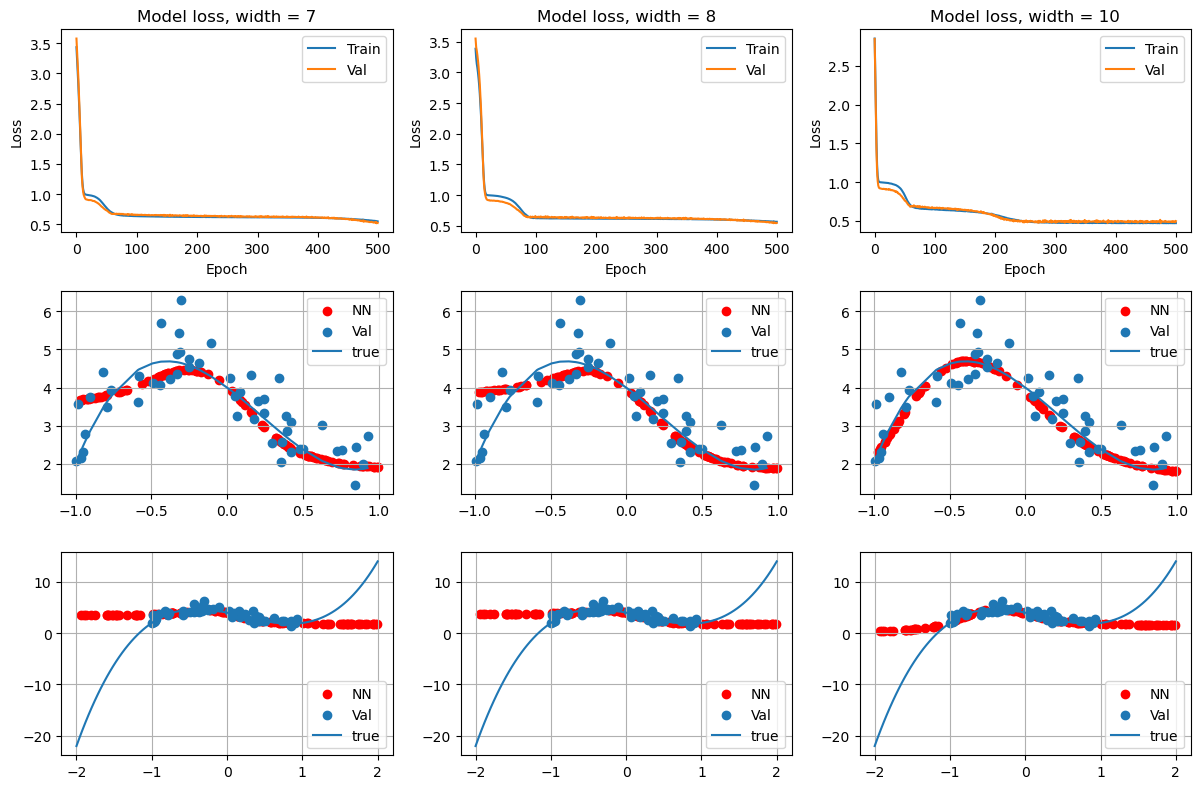

In [26]:
# four hidden layers, Varying NN width, adam, mae as loss
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
axs = ax.flatten()
for i in range(3):
    x_train, y_train, x_valid, y_valid, y_target = GenerateDataPoly(Ntrain = 500, noise = 0.6)
    model, history = NN_BuildAndTrain2(x_train, y_train, x_valid, y_valid, width=6 + 2**i, Nepochs=500)
    axs[i].plot(history.history['loss'])
    axs[i].plot(history.history['val_loss'])
    axs[i].set_title(f'Model loss, width = {6 + 2**i}')
    axs[i].set_ylabel('Loss')
    axs[i].set_xlabel('Epoch')
    axs[i].legend(['Train', 'Val'], loc='best')

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    axs[i+3].scatter(x_predicted, y_predicted,color='r')
    axs[i+3].scatter(x_valid, y_valid)
    axs[i+3].plot(x_valid, y_target)
    axs[i+3].legend(['NN', 'Val', 'true'], loc='best')
    axs[i+3].grid(True)

    x_predicted = np.random.uniform(-2, 2, 100)
    y_predicted = model.predict(x_predicted)
    axs[i+6].scatter(x_predicted, y_predicted,color='r')
    axs[i+6].scatter(x_valid, y_valid)
    x_target = np.linspace(-2,2,100)
    y_target = 4- 3 * x_target -2 * x_target**2 + 3 * x_target**3
    axs[i+6].plot(x_target, y_target)
    axs[i+6].legend(['NN', 'Val', 'true'], loc='best')
    axs[i+6].grid(True)


plt.tight_layout()
plt.show()

While in the first two cases the results are poor, we get great results for the widest net! We could say that with width=8 we get a sweet spot for the current architecture while keeping the width low.
However still not a good inference outside the data interval...

\

We then try with a humoungus net to get the correct behaviore for each $x$... To avoid overlearning however we preemptively implement two regularization techniques: dropout and early stopping.

In [43]:
def NN_BuildAndTrain2(x_train, y_train, x_valid, y_valid, width=6,Nepochs=60):
    # build and optimize the neural network
    model = tf.keras.Sequential()
    model.add(Dense(width, activation='sigmoid', input_shape=(1,)) )
    model.add(Dense(width, activation='sigmoid') )
    model.add(Dropout(0.25))                                             # Dropout layer for regularization
    model.add(Dense(width, activation='sigmoid') )
    model.add(Dropout(0.25))
    model.add(Dense(width, activation='relu')) 
    model.add(Dense(1, activation='linear')) 

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

    earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta = 0.1, patience = 300)

    history = model.fit(x=x_train, y=y_train,  verbose=0,
            batch_size=32, epochs=Nepochs,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid),
            callbacks=[earlystop]
            )
    
    return model, history

4/4 [==============================] - 0s 4ms/step


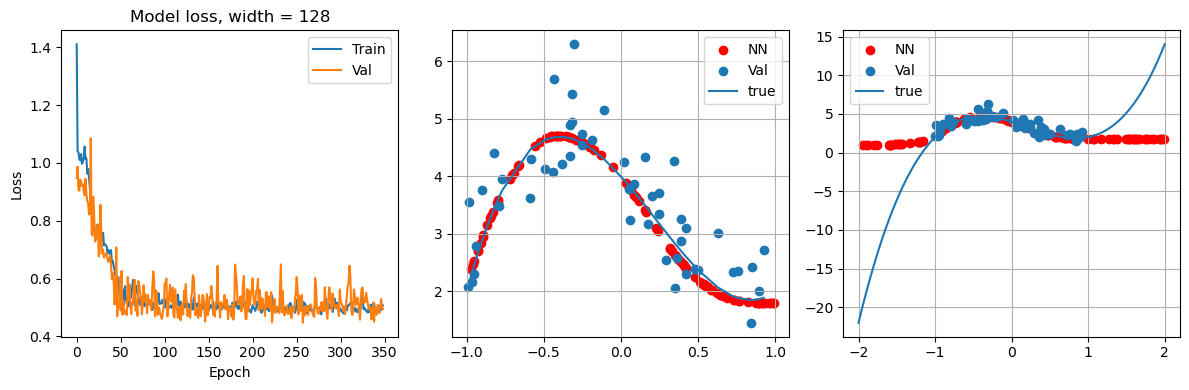

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
axs = ax.flatten()

x_train, y_train, x_valid, y_valid, y_target = GenerateDataPoly(Ntrain = 500, noise = 0.6)
model, history = NN_BuildAndTrain2(x_train, y_train, x_valid, y_valid, width=256, Nepochs=2000)
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title(f'Model loss, width = {128}')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Val'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
axs[1].scatter(x_predicted, y_predicted,color='r')
axs[1].scatter(x_valid, y_valid)
axs[1].plot(x_valid, y_target)
axs[1].legend(['NN', 'Val', 'true'], loc='best')
axs[1].grid(True)

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
axs[2].scatter(x_predicted, y_predicted,color='r')
axs[2].scatter(x_valid, y_valid)
x_target = np.linspace(-2,2,100)
y_target = 4- 3 * x_target -2 * x_target**2 + 3 * x_target**3
axs[2].plot(x_target, y_target)
axs[2].legend(['NN', 'Val', 'true'], loc='best')
axs[2].grid(True)


plt.tight_layout()
plt.show()

We cannot blame only the network... the data is not representative of the world outside $[-1,1]$! Indeed the function quickly changes its behaviour.

Couclusion: a certain complexity is needed when dealing with difficult problems, otherwise the fit will not be good. However, as the complexity increases and the goodness of the fit too, after a certain treshold the ability to predict could worsen. That is because the model is not learning a law anymore, but it is learning the nuances of the data, e.g. the noise.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

As before, we are keeping Ntrain$=500$ and noise$=0.6$.  

In [45]:
def blanket(x,y):
    return np.sin(x**2+y**2)

def GenerateDataBlanket(Ntrain = 500, noise = 0.6):
    # generates noisy dataset divided into train and validation/test
    np.random.seed(0)
    x_train = np.random.uniform(-1.5, 1.5, (Ntrain,2))
    x_valid = np.random.uniform(-1.5, 1.5, (int(Ntrain/10),2))
    y_target = blanket(x_valid[:,0], x_valid[:,1]) # ideal (target) function

    y_train = np.random.normal(blanket(x_train[:,0], x_train[:,1]), noise) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(blanket(x_valid[:,0], x_valid[:,1]), noise)
    return x_train, y_train, x_valid, y_valid, y_target

First let us take a look at the problem.

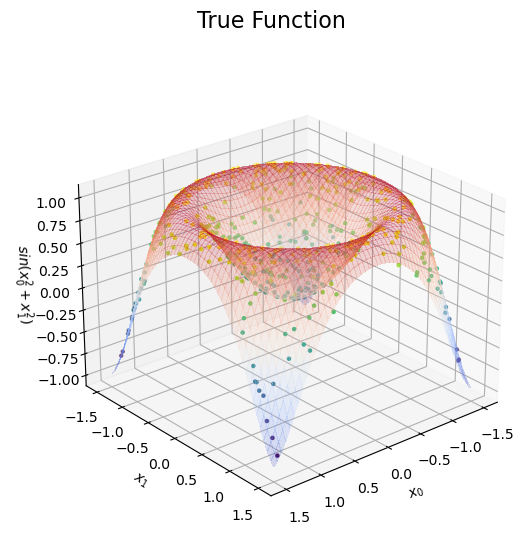

In [49]:
# Load and plot data for the first plot
x_train, y_train, x_valid, y_valid, y_target = GenerateDataBlanket(Ntrain = 500, noise = 0.6)
X = x_train[:,0]
Y = x_train[:,1]
Z = blanket(x_train[:,0], x_train[:,1])

fig = plt.figure(figsize=(10, 6))  # Set the figure size
fig.suptitle('True Function', fontsize=16)
ax1 = fig.add_subplot(111, projection='3d')  # 121 indicates 1 row, 1 columns, plot 1
ax1.scatter(X, Y, Z, c=Z, marker='.')
ax1.set_xlabel(r'$x_0$ ')
ax1.set_ylabel(r'$x_1$ ')
ax1.set_zlabel(r'$sin(x_0^2+x_1^2)$ ')
ax1.view_init(25, 50)

from matplotlib import cm
X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-1.5, 1.5, 0.01)
X, Y = np.meshgrid(X, Y)
R = X**2 + Y**2
Z = np.sin(R)

# Plot the surface.
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.2)

plt.show()

For this problem, after some trial and error, we settled for a net with 2 layers (sigmoid and relu), width 30, mse as loss with adam optimizer and as regularization technique a dropout layer

In [82]:
def NN_BuildAndTrain4(x_train, y_train, x_valid, y_valid, width=6,Nepochs=60):
    # build and optimize the neural network
    model = tf.keras.Sequential()
    model.add(Dense(int(width/2), activation='sigmoid', input_shape=(2,)) )
    model.add(Dense(width, activation='sigmoid') )
    #model.add(Dense(width, activation='sigmoid') )
    #model.add(Dropout(0.25))                                             # Dropout layer for regularization
    #model.add(Dense(width, activation='sigmoid') )
    model.add(Dense(width, activation='relu')) 
    model.add(Dense(int(width/2), activation='relu')) 
    model.add(Dense(1, activation='linear')) 

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])

    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  patience=400, mode='auto')

    history = model.fit(x=x_train, y=y_train,  verbose=0,
            batch_size=32, epochs=Nepochs,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid),
            callbacks=[earlystop]
            )
    
    return model, history

2/2 [==============================] - 0s 5ms/step - loss: 0.1109 - mean_absolute_error: 0.2195

True values mse (loss): 0.11088423430919647
True values mae (metrics): 0.21945606172084808


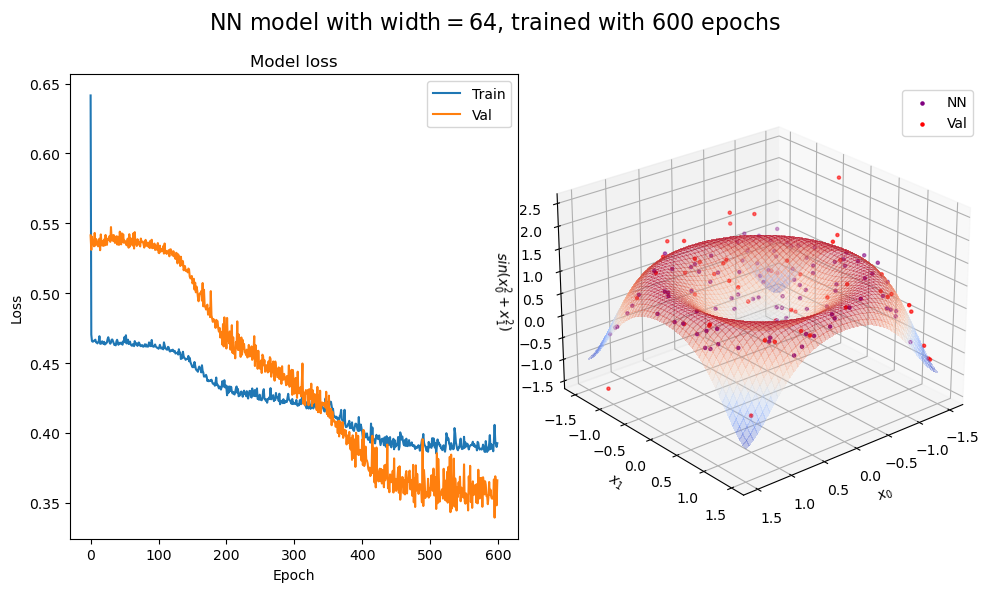

In [83]:
fig = plt.figure(figsize=(10, 6))
#axs = ax.flatten()
fig.suptitle(r'NN model with width$=64$, trained with 600 epochs', fontsize=16)

x_train, y_train, x_valid, y_valid, y_target = GenerateDataBlanket(Ntrain = 500, noise = 0.6)
model, history = NN_BuildAndTrain4(x_train, y_train, x_valid, y_valid, width=32, Nepochs=600)
axs[0] = fig.add_subplot(121) 
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title(f'Model loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Val'], loc='best')

#fig = plt.figure(figsize=(10, 6))  # Set the figure size


axs[1] = fig.add_subplot(122, projection='3d')  # 121 indicates 1 row, 2 columns, plot 1
x_predicted = np.random.uniform(-1.5, 1.5, (100,2))
y_predicted = model.predict(x_predicted)
axs[1].scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, c="purple", marker='.')
axs[1].set_xlabel(r'$x_0$ ')
axs[1].set_ylabel(r'$x_1$ ')
axs[1].set_zlabel(r'$sin(x_0^2+x_1^2)$ ')
axs[1].view_init(25, 50)


axs[1].scatter(x_valid[:,0], x_valid[:,1], y_valid, c="red", marker='.')

X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-1.5, 1.5, 0.01)
X, Y = np.meshgrid(X, Y)
R = X**2 + Y**2
Z = np.sin(R)
# Plot the surface.
surf = axs[1].plot_surface(X, Y, Z, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False, alpha=0.3)

axs[1].legend(['NN', 'Val'], loc='best')
axs[1].grid(True)

score = model.evaluate(x_valid, y_target, verbose=1)

# print performance
print()
print('True values mse (loss):', score[0])
print('True values mae (metrics):', score[1])



plt.tight_layout()
plt.show()

We evaluate our result while looking at the mse calculated between the predicted data for our fitted model and the true underlying function. The mean square error is $0.11088$, giving us a precision that is acceptable.

 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 3ms/step


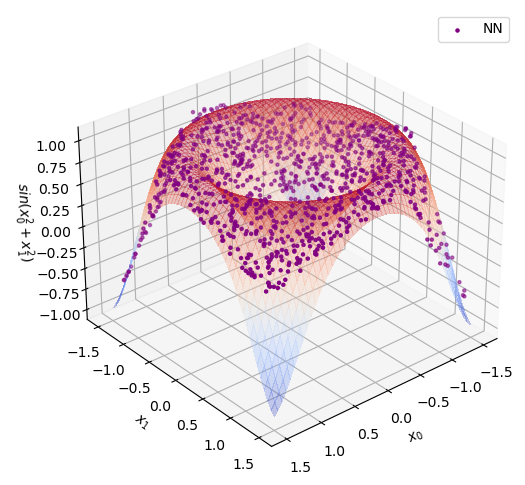

In [84]:
fig = plt.figure(figsize=(10, 6))  # Set the figure size
ax = fig.add_subplot(111, projection='3d')  # 121 indicates 1 row, 2 columns, plot 1
x_predicted = np.random.uniform(-1.5, 1.5, (1000,2))
y_predicted = model.predict(x_predicted)
ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, c="purple", marker='.')
ax.set_xlabel(r'$x_0$ ')
ax.set_ylabel(r'$x_1$ ')
ax.set_zlabel(r'$sin(x_0^2+x_1^2)$ ')
ax.view_init(30, 50)


X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-1.5, 1.5, 0.01)
X, Y = np.meshgrid(X, Y)
R = X**2 + Y**2
Z = np.sin(R)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False, alpha=0.3)

ax.legend(['NN'], loc='best')
ax.grid(True)

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [12]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

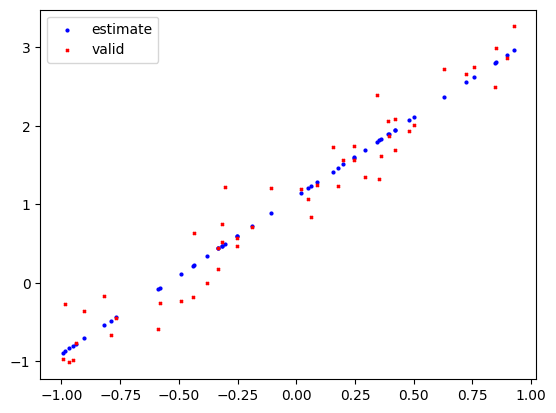


2/2 [==============================] - 0s 101ms/step - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0808 - val_mse: 0.0808


[array([[2.0087578]], dtype=float32), array([1.1064383], dtype=float32)]

In [13]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()